In [13]:
import sys

sys.path.append("../../")


import numpy as np
import matplotlib.pyplot as plt
import moser_rust
from pysat.formula import CNF

from random_walk import moser_walk
from pathlib import Path

import random
import glob
from os.path import join

def evaluate_moser_rust_for_dataset(
        data_path, N_STEPS_MOSER, N_RUNS_MOSER, SEED = 0,
    ):
        av_energies = []
        instances = glob.glob(join(data_path, "*.cnf"))
        for problem_path in instances:
            cnf_formula = CNF(from_file=problem_path)
            n = cnf_formula.nv
            m = len(cnf_formula.clauses)
            model_probabilities = np.ones(n)/2
            _, _, final_energies = moser_rust.run_moser_python(
                            problem_path,
                            model_probabilities,
                            N_STEPS_MOSER,
                            N_RUNS_MOSER,
                            SEED,
                    )
            av_energies.append(np.mean(final_energies) / m)
        return (av_energies)

In [18]:
data_path = "../../Data/Blocksworld"
N_STEPS_MOSER_list = [100, 500, 1000, 5000, 10000]
N_RUNS_MOSER = 5
av_energies_list = []
for N_STEPS_MOSER in N_STEPS_MOSER_list:
    av_energies = evaluate_moser_rust_for_dataset(
        data_path, N_STEPS_MOSER, N_RUNS_MOSER, SEED = 0,
    )
    av_energies_list.append(av_energies)


['../../Data/Blocksworld/medium.cnf', '../../Data/Blocksworld/huge.cnf', '../../Data/Blocksworld/bw_large.a.cnf', '../../Data/Blocksworld/bw_large.c.cnf', '../../Data/Blocksworld/bw_large.b.cnf', '../../Data/Blocksworld/anomaly.cnf', '../../Data/Blocksworld/bw_large.d.cnf']
n,m 116 953
32
Loading problem with 116 variables and 953 clauses
Round 1 ending with 55 violated clauses
Round 2 ending with 50 violated clauses
Round 3 ending with 32 violated clauses
Round 4 ending with 42 violated clauses
Round 5 ending with 36 violated clauses
n,m 459 7054
Loading problem with 459 variables and 7054 clauses
Round 1 ending with 717 violated clauses
Round 2 ending with 598 violated clauses
Round 3 ending with 645 violated clauses
Round 4 ending with 767 violated clauses
Round 5 ending with 779 violated clauses
588
n,m 459 4675
Loading problem with 459 variables and 4675 clauses
477
Round 1 ending with 556 violated clauses
Round 2 ending with 483 violated clauses
Round 3 ending with 599 violated c

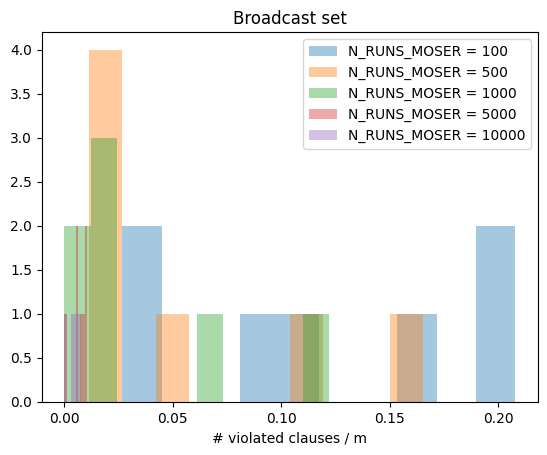

In [39]:
for i, av_energies in enumerate(av_energies_list):
    plt.hist(av_energies, alpha = 0.4, label = "N_RUNS_MOSER = " + str(N_STEPS_MOSER_list[i]))
plt.legend()
plt.xlabel("frequency")
plt.xlabel("# violated clauses / m")
plt.title("Broadcast set")
plt.show()


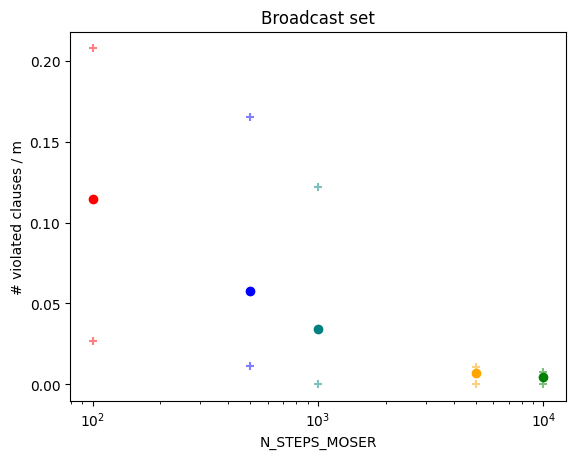

In [37]:
color = ["red", "blue", "teal", "orange", "green"]
for i in range(len(N_STEPS_MOSER_list)):
    plt.scatter(np.array([N_STEPS_MOSER_list[i]]), np.array([np.mean(av_energies_list[i])]), color = color[i], marker = "o")
    plt.scatter([N_STEPS_MOSER_list[i]], [np.min(av_energies_list[i])], color = color[i], alpha = 0.5, marker = "+")
    plt.scatter([N_STEPS_MOSER_list[i]], [np.max(av_energies_list[i])], color = color[i], alpha = 0.5, marker = "+")
plt.xlabel("N_STEPS_MOSER")
plt.ylabel("# violated clauses / m")
plt.title("Broadcast set")
plt.xscale("log")
plt.show()

In [40]:
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet"
N_STEPS_MOSER_list = [100, 500, 1000, 5000, 10000, 50000, 100000]
N_RUNS_MOSER = 5
av_energies_list = []
for N_STEPS_MOSER in N_STEPS_MOSER_list:
    av_energies = evaluate_moser_rust_for_dataset(
        data_path, N_STEPS_MOSER, N_RUNS_MOSER, SEED = 0,
    )
    av_energies_list.append(av_energies)


['/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet/41-76896.cnf', '/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet/41-107929.cnf', '/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet/41-112276.cnf', '/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet/41-112448.cnf', '/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet/41-111380.cnf', '/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet/41-85460.cnf', '/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet/41-82333.cnf', '/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_so

In [ ]:
for i, av_energies in enumerate(av_energies_list):
    plt.hist(av_energies, alpha = 0.4, label = "N_RUNS_MOSER = " + str(N_STEPS_MOSER_list[i]))
plt.legend()
plt.xlabel("frequency")
plt.xlabel("# violated clauses / m")
plt.title("Broadcast set")
plt.show()

In [ ]:
color = ["red", "blue", "teal", "orange", "green"]
for i in range(len(N_STEPS_MOSER_list)):
    plt.scatter(np.array([N_STEPS_MOSER_list[i]]), np.array([np.mean(av_energies_list[i])]), color = color[i], marker = "o")
    plt.scatter([N_STEPS_MOSER_list[i]], [np.min(av_energies_list[i])], color = color[i], alpha = 0.5, marker = "+")
    plt.scatter([N_STEPS_MOSER_list[i]], [np.max(av_energies_list[i])], color = color[i], alpha = 0.5, marker = "+")
plt.xlabel("N_STEPS_MOSER")
plt.ylabel("# violated clauses / m")
plt.title("Broadcast set")
plt.xscale("log")
plt.show()